# INTRODUCTION

blah blah blah

# READ DATA

## Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import requests
import io
import re
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import plotly.express as px

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


## Internet Users

### Read Data

In [2]:
data = pd.read_csv('/Users/nikodem/Desktop/dissertation/Code/Dataset/INTERNET USERS Data/Internet_users.csv')
df = pd.DataFrame(data)
df

Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                                       Indicator Name  Indicator Code  1960  \
0    Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
1    Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
2    Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
3    Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
4    Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
..                                                ...             ...   ...   
261  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
262  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
263  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
264  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
265  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   

     1961  1962  1963  1964  1965  ...       2013       2014       2015  \
0     NaN   NaN   NaN   NaN   NaN  ...  78.900000  83.780000  88.661227   
1     NaN   NaN   NaN   NaN   NaN  ...  10.189313  12.304789  14.625664   
2     NaN   NaN   NaN   NaN   NaN  ...   5.900000   7.000000   8.260000   
3     NaN   NaN   NaN   NaN   NaN  ...  12.577170  14.934062  18.192287   
4     NaN   NaN   NaN   NaN   NaN  ...  13.000000  21.400000  22.000000   
..    ...   ...   ...   ...   ...  ...        ...        ...        ...   
261   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
262   NaN   NaN   NaN   NaN   NaN  ...  20.000000  22.550000  24.085409   
263   NaN   NaN   NaN   NaN   NaN  ...  46.500000  49.000000  51.919116   
264   NaN   NaN   NaN   NaN   NaN  ...   4.800000   6.500000   8.800000   
265   NaN   NaN   NaN   NaN   NaN  ...  15.500000  16.364740  22.742818   

          2016       2017       2018       2019       2020  2021  Unnamed: 66  
0    93.542454  97.170000        NaN        NaN        NaN   NaN          NaN  
1    15.894355  18.240060  21.700695  24.304658  27.350308   NaN          NaN  
2    11.000000  13.500000  16.800000  17.600000  18.400000   NaN          NaN  
3    20.926632  24.663587  29.338368  31.785861  34.128137   NaN          NaN  
4    23.200000  26.000000  29.000000  32.400000  36.000000   NaN          NaN  
..         ...        ...        ...        ...        ...   ...          ...  
261        NaN  83.893597  89.443032        NaN        NaN   NaN          NaN  
262  24.579208  26.718355        NaN        NaN        NaN   NaN          NaN  
263  54.000000  56.167394  62.400000  68.200000  70.000000   NaN          NaN  
264  10.300000  12.200000  14.299997  16.800000  19.800000   NaN          NaN  
265  23.119989  24.400000  25.000000  25.100000  29.300000   NaN          NaN  

[266 rows x 67 columns]

### data Cleaning

In [3]:
df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)


In [4]:
df

Country Name Country Code  1960  1961  1962  1963  1964  \
0                          Aruba          ABW   NaN   NaN   NaN   NaN   NaN   
1    Africa Eastern and Southern          AFE   NaN   NaN   NaN   NaN   NaN   
2                    Afghanistan          AFG   NaN   NaN   NaN   NaN   NaN   
3     Africa Western and Central          AFW   NaN   NaN   NaN   NaN   NaN   
4                         Angola          AGO   NaN   NaN   NaN   NaN   NaN   
..                           ...          ...   ...   ...   ...   ...   ...   
261                       Kosovo          XKX   NaN   NaN   NaN   NaN   NaN   
262                  Yemen, Rep.          YEM   NaN   NaN   NaN   NaN   NaN   
263                 South Africa          ZAF   NaN   NaN   NaN   NaN   NaN   
264                       Zambia          ZMB   NaN   NaN   NaN   NaN   NaN   
265                     Zimbabwe          ZWE   NaN   NaN   NaN   NaN   NaN   

     1965  1966  1967  ...       2013       2014       2015       2016  \
0     NaN   NaN   NaN  ...  78.900000  83.780000  88.661227  93.542454   
1     NaN   NaN   NaN  ...  10.189313  12.304789  14.625664  15.894355   
2     NaN   NaN   NaN  ...   5.900000   7.000000   8.260000  11.000000   
3     NaN   NaN   NaN  ...  12.577170  14.934062  18.192287  20.926632   
4     NaN   NaN   NaN  ...  13.000000  21.400000  22.000000  23.200000   
..    ...   ...   ...  ...        ...        ...        ...        ...   
261   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
262   NaN   NaN   NaN  ...  20.000000  22.550000  24.085409  24.579208   
263   NaN   NaN   NaN  ...  46.500000  49.000000  51.919116  54.000000   
264   NaN   NaN   NaN  ...   4.800000   6.500000   8.800000  10.300000   
265   NaN   NaN   NaN  ...  15.500000  16.364740  22.742818  23.119989   

          2017       2018       2019       2020  2021  Unnamed: 66  
0    97.170000        NaN        NaN        NaN   NaN          NaN  
1    18.240060  21.700695  24.304658  27.350308   NaN          NaN  
2    13.500000  16.800000  17.600000  18.400000   NaN          NaN  
3    24.663587  29.338368  31.785861  34.128137   NaN          NaN  
4    26.000000  29.000000  32.400000  36.000000   NaN          NaN  
..         ...        ...        ...        ...   ...          ...  
261  83.893597  89.443032        NaN        NaN   NaN          NaN  
262  26.718355        NaN        NaN        NaN   NaN          NaN  
263  56.167394  62.400000  68.200000  70.000000   NaN          NaN  
264  12.200000  14.299997  16.800000  19.800000   NaN          NaN  
265  24.400000  25.000000  25.100000  29.300000   NaN          NaN  

[266 rows x 65 columns]

In [5]:
INTUSER = (df.set_index(["Country Name", "Country Code"])
         .stack()
         .reset_index(name='Internet_user%')
         .rename(columns={'level_2':'Date'}))

In [6]:
INTUSER

Country Name Country Code  Date  Internet_user%
0           Aruba          ABW  1990        0.000000
1           Aruba          ABW  1991        0.000000
2           Aruba          ABW  1992        0.000000
3           Aruba          ABW  1993        0.000000
4           Aruba          ABW  1994        0.000000
...           ...          ...   ...             ...
7669     Zimbabwe          ZWE  2016       23.119989
7670     Zimbabwe          ZWE  2017       24.400000
7671     Zimbabwe          ZWE  2018       25.000000
7672     Zimbabwe          ZWE  2019       25.100000
7673     Zimbabwe          ZWE  2020       29.300000

[7674 rows x 4 columns]

## GDP

### Read Data

In [7]:
data = pd.read_csv('/Users/nikodem/Desktop/dissertation/Code/Dataset/GDP Annual/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_4676785.csv')
df = pd.DataFrame(data)
df

Country Name Country Code         Indicator Name  \
0                          Aruba          ABW  GDP growth (annual %)   
1    Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                    Afghanistan          AFG  GDP growth (annual %)   
3     Africa Western and Central          AFW  GDP growth (annual %)   
4                         Angola          AGO  GDP growth (annual %)   
..                           ...          ...                    ...   
261                       Kosovo          XKX  GDP growth (annual %)   
262                  Yemen, Rep.          YEM  GDP growth (annual %)   
263                 South Africa          ZAF  GDP growth (annual %)   
264                       Zambia          ZMB  GDP growth (annual %)   
265                     Zimbabwe          ZWE  GDP growth (annual %)   

        Indicator Code  1960      1961      1962      1963       1964  \
0    NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
1    NY.GDP.MKTP.KD.ZG   NaN  0.239594  7.980768  5.164334   4.579952   
2    NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
3    NY.GDP.MKTP.KD.ZG   NaN  1.848752  3.770220  7.272440   5.396349   
4    NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
..                 ...   ...       ...       ...       ...        ...   
261  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
262  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
263  NY.GDP.MKTP.KD.ZG   NaN  3.844734  6.177931  7.373709   7.939609   
264  NY.GDP.MKTP.KD.ZG   NaN  1.361382 -2.490839  3.272393  12.214048   
265  NY.GDP.MKTP.KD.ZG   NaN  6.316157  1.434471  6.244345  -1.106172   

          1965  ...      2013      2014       2015      2016      2017  \
0          NaN  ...  6.429817 -0.020479   3.543630  2.116716  5.482371   
1     5.327717  ...  4.200209  3.984387   2.952845  2.217017  2.557135   
2          NaN  ...  5.600745  2.724543   1.451315  2.260314  2.647003   
3     4.049793  ...  6.104192  5.927355   2.745894  0.127844  2.317679   
4          NaN  ...  4.950000  4.820000   0.940000 -2.580000 -0.150000   
..         ...  ...       ...       ...        ...       ...       ...   
261        NaN  ...  5.340908  3.348804   5.916270  5.571757  4.825690   
262        NaN  ...  4.823415 -0.188574 -27.994546 -9.375124 -5.071796   
263   6.122798  ...  2.485468  1.413826   1.321862  0.664552  1.157947   
264  16.647456  ...  5.057232  4.697992   2.920375  3.776679  3.504336   
265   4.910571  ...  1.989493  2.376929   1.779873  0.755869  4.709492   

         2018      2019       2020      2021  Unnamed: 66  
0    1.267218 -2.085600 -22.318948       NaN          NaN  
1    2.485244  2.025941  -2.886856  4.303667          NaN  
2    1.189228  3.911603  -2.351101       NaN          NaN  
3    2.952190  3.202544  -0.897014  3.914799          NaN  
4   -1.316312 -0.700000  -5.500000  0.700000          NaN  
..        ...       ...        ...       ...          ...  
261  3.406631  4.756831  -5.340275  9.127578          NaN  
262  0.752448  1.400000  -8.500000 -2.061513          NaN  
263  1.487617  0.113054  -6.431975  4.914603          NaN  
264  4.034494  1.441306  -2.785055  3.572815          NaN  
265  4.824211 -6.144236  -6.248748  5.849420          NaN  

[266 rows x 67 columns]

### data Cleaning

In [8]:
df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)


In [9]:
df

Country Name Country Code  1960      1961      1962  \
0                          Aruba          ABW   NaN       NaN       NaN   
1    Africa Eastern and Southern          AFE   NaN  0.239594  7.980768   
2                    Afghanistan          AFG   NaN       NaN       NaN   
3     Africa Western and Central          AFW   NaN  1.848752  3.770220   
4                         Angola          AGO   NaN       NaN       NaN   
..                           ...          ...   ...       ...       ...   
261                       Kosovo          XKX   NaN       NaN       NaN   
262                  Yemen, Rep.          YEM   NaN       NaN       NaN   
263                 South Africa          ZAF   NaN  3.844734  6.177931   
264                       Zambia          ZMB   NaN  1.361382 -2.490839   
265                     Zimbabwe          ZWE   NaN  6.316157  1.434471   

         1963       1964       1965      1966      1967  ...      2013  \
0         NaN        NaN        NaN       NaN       NaN  ...  6.429817   
1    5.164334   4.579952   5.327717  3.912108  5.256810  ...  4.200209   
2         NaN        NaN        NaN       NaN       NaN  ...  5.600745   
3    7.272440   5.396349   4.049793 -1.787079 -9.546464  ...  6.104192   
4         NaN        NaN        NaN       NaN       NaN  ...  4.950000   
..        ...        ...        ...       ...       ...  ...       ...   
261       NaN        NaN        NaN       NaN       NaN  ...  5.340908   
262       NaN        NaN        NaN       NaN       NaN  ...  4.823415   
263  7.373709   7.939609   6.122798  4.438386  7.196523  ...  2.485468   
264  3.272393  12.214048  16.647456 -5.570310  7.919697  ...  5.057232   
265  6.244345  -1.106172   4.910571  1.523130  8.367009  ...  1.989493   

         2014       2015      2016      2017      2018      2019       2020  \
0   -0.020479   3.543630  2.116716  5.482371  1.267218 -2.085600 -22.318948   
1    3.984387   2.952845  2.217017  2.557135  2.485244  2.025941  -2.886856   
2    2.724543   1.451315  2.260314  2.647003  1.189228  3.911603  -2.351101   
3    5.927355   2.745894  0.127844  2.317679  2.952190  3.202544  -0.897014   
4    4.820000   0.940000 -2.580000 -0.150000 -1.316312 -0.700000  -5.500000   
..        ...        ...       ...       ...       ...       ...        ...   
261  3.348804   5.916270  5.571757  4.825690  3.406631  4.756831  -5.340275   
262 -0.188574 -27.994546 -9.375124 -5.071796  0.752448  1.400000  -8.500000   
263  1.413826   1.321862  0.664552  1.157947  1.487617  0.113054  -6.431975   
264  4.697992   2.920375  3.776679  3.504336  4.034494  1.441306  -2.785055   
265  2.376929   1.779873  0.755869  4.709492  4.824211 -6.144236  -6.248748   

         2021  Unnamed: 66  
0         NaN          NaN  
1    4.303667          NaN  
2         NaN          NaN  
3    3.914799          NaN  
4    0.700000          NaN  
..        ...          ...  
261  9.127578          NaN  
262 -2.061513          NaN  
263  4.914603          NaN  
264  3.572815          NaN  
265  5.849420          NaN  

[266 rows x 65 columns]

In [10]:
GDP = (df.set_index(["Country Name", "Country Code"])
         .stack()
         .reset_index(name='GDP')
         .rename(columns={'level_2':'Date'}))

In [11]:
GDP

Country Name Country Code  Date        GDP
0            Aruba          ABW  1987  16.078431
1            Aruba          ABW  1988  18.648649
2            Aruba          ABW  1989  12.129841
3            Aruba          ABW  1990   3.961402
4            Aruba          ABW  1991   7.962872
...            ...          ...   ...        ...
12418     Zimbabwe          ZWE  2017   4.709492
12419     Zimbabwe          ZWE  2018   4.824211
12420     Zimbabwe          ZWE  2019  -6.144236
12421     Zimbabwe          ZWE  2020  -6.248748
12422     Zimbabwe          ZWE  2021   5.849420

[12423 rows x 4 columns]

## Population

### Read Data

In [12]:
data = pd.read_csv('/Users/nikodem/Desktop/dissertation/Code/Dataset/Population/API_SP.POP.TOTL_DS2_en_csv_v2_4676749.csv')
df = pd.DataFrame(data)
df

Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL      54208.0      55434.0      56234.0      56699.0   
1      SP.POP.TOTL  130836765.0  134159786.0  137614644.0  141202036.0   
2      SP.POP.TOTL    8996967.0    9169406.0    9351442.0    9543200.0   
3      SP.POP.TOTL   96396419.0   98407221.0  100506960.0  102691339.0   
4      SP.POP.TOTL    5454938.0    5531451.0    5608499.0    5679409.0   
..             ...          ...          ...          ...          ...   
261    SP.POP.TOTL     947000.0     966000.0     994000.0    1022000.0   
262    SP.POP.TOTL    5315351.0    5393034.0    5473671.0    5556767.0   
263    SP.POP.TOTL   17099836.0   17524533.0   17965733.0   18423157.0   
264    SP.POP.TOTL    3070780.0    3164330.0    3260645.0    3360099.0   
265    SP.POP.TOTL    3776679.0    3905038.0    4039209.0    4178726.0   

            1964         1965  ...         2013         2014         2015  \
0        57029.0      57357.0  ...     103165.0     103776.0     104339.0   
1    144920186.0  148769974.0  ...  562601578.0  578075373.0  593871847.0   
2      9744772.0    9956318.0  ...   32269592.0   33370804.0   34413603.0   
3    104953470.0  107289875.0  ...  380437896.0  390882979.0  401586651.0   
4      5734995.0    5770573.0  ...   26015786.0   26941773.0   27884380.0   
..           ...          ...  ...          ...          ...          ...   
261    1050000.0    1078000.0  ...    1818117.0    1812771.0    1788196.0   
262    5641598.0    5727745.0  ...   25147112.0   25823488.0   26497881.0   
263   18896303.0   19384838.0  ...   53687125.0   54544184.0   55386369.0   
264    3463211.0    3570466.0  ...   14926551.0   15399793.0   15879370.0   
265    4322854.0    4471178.0  ...   13350378.0   13586710.0   13814642.0   

            2016         2017         2018         2019         2020  \
0       104865.0     105361.0     105846.0     106310.0     106766.0   
1    609978946.0  626392880.0  643090131.0  660046272.0  677243299.0   
2     35383028.0   36296111.0   37171922.0   38041757.0   38928341.0   
3    412551299.0  423769930.0  435229381.0  446911598.0  458803476.0   
4     28842482.0   29816769.0   30809787.0   31825299.0   32866268.0   
..           ...          ...          ...          ...          ...   
261    1777557.0    1791003.0    1797085.0    1788878.0    1790133.0   
262   27168210.0   27834811.0   28498683.0   29161922.0   29825968.0   
263   56207649.0   57009751.0   57792520.0   58558267.0   59308690.0   
264   16363449.0   16853608.0   17351714.0   17861034.0   18383956.0   
265   14030338.0   14236599.0   14438812.0   14645473.0   14862927.0   

            2021  Unnamed: 66  
0       107195.0          NaN  
1    694665117.0          NaN  
2     39835428.0          NaN  
3    470898870.0          NaN  
4     33933611.0          NaN  
..           ...          ...  
261    1806279.0          NaN  
262   30490639.0          NaN  
263   60041996.0          NaN  
264   18920657.0          NaN  
265   15092171.0          NaN  

[266 rows x 67 columns]

### data Cleaning

In [13]:
df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)


In [14]:
df

Country Name Country Code         1960         1961  \
0                          Aruba          ABW      54208.0      55434.0   
1    Africa Eastern and Southern          AFE  130836765.0  134159786.0   
2                    Afghanistan          AFG    8996967.0    9169406.0   
3     Africa Western and Central          AFW   96396419.0   98407221.0   
4                         Angola          AGO    5454938.0    5531451.0   
..                           ...          ...          ...          ...   
261                       Kosovo          XKX     947000.0     966000.0   
262                  Yemen, Rep.          YEM    5315351.0    5393034.0   
263                 South Africa          ZAF   17099836.0   17524533.0   
264                       Zambia          ZMB    3070780.0    3164330.0   
265                     Zimbabwe          ZWE    3776679.0    3905038.0   

            1962         1963         1964         1965         1966  \
0        56234.0      56699.0      57029.0      57357.0      57702.0   
1    137614644.0  141202036.0  144920186.0  148769974.0  152752671.0   
2      9351442.0    9543200.0    9744772.0    9956318.0   10174840.0   
3    100506960.0  102691339.0  104953470.0  107289875.0  109701811.0   
4      5608499.0    5679409.0    5734995.0    5770573.0    5781305.0   
..           ...          ...          ...          ...          ...   
261     994000.0    1022000.0    1050000.0    1078000.0    1106000.0   
262    5473671.0    5556767.0    5641598.0    5727745.0    5816241.0   
263   17965733.0   18423157.0   18896303.0   19384838.0   19888259.0   
264    3260645.0    3360099.0    3463211.0    3570466.0    3681953.0   
265    4039209.0    4178726.0    4322854.0    4471178.0    4623340.0   

            1967  ...         2013         2014         2015         2016  \
0        58044.0  ...     103165.0     103776.0     104339.0     104865.0   
1    156876454.0  ...  562601578.0  578075373.0  593871847.0  609978946.0   
2     10399936.0  ...   32269592.0   33370804.0   34413603.0   35383028.0   
3    112195950.0  ...  380437896.0  390882979.0  401586651.0  412551299.0   
4      5774440.0  ...   26015786.0   26941773.0   27884380.0   28842482.0   
..           ...  ...          ...          ...          ...          ...   
261    1135000.0  ...    1818117.0    1812771.0    1788196.0    1777557.0   
262    5907873.0  ...   25147112.0   25823488.0   26497881.0   27168210.0   
263   20406863.0  ...   53687125.0   54544184.0   55386369.0   56207649.0   
264    3797877.0  ...   14926551.0   15399793.0   15879370.0   16363449.0   
265    4779825.0  ...   13350378.0   13586710.0   13814642.0   14030338.0   

            2017         2018         2019         2020         2021  \
0       105361.0     105846.0     106310.0     106766.0     107195.0   
1    626392880.0  643090131.0  660046272.0  677243299.0  694665117.0   
2     36296111.0   37171922.0   38041757.0   38928341.0   39835428.0   
3    423769930.0  435229381.0  446911598.0  458803476.0  470898870.0   
4     29816769.0   30809787.0   31825299.0   32866268.0   33933611.0   
..           ...          ...          ...          ...          ...   
261    1791003.0    1797085.0    1788878.0    1790133.0    1806279.0   
262   27834811.0   28498683.0   29161922.0   29825968.0   30490639.0   
263   57009751.0   57792520.0   58558267.0   59308690.0   60041996.0   
264   16853608.0   17351714.0   17861034.0   18383956.0   18920657.0   
265   14236599.0   14438812.0   14645473.0   14862927.0   15092171.0   

     Unnamed: 66  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
261          NaN  
262          NaN  
263          NaN  
264          NaN  
265          NaN  

[266 rows x 65 columns]

In [15]:
POPULATION = (df.set_index(["Country Name", "Country Code"])
         .stack()
         .reset_index(name='Population')
         .rename(columns={'level_2':'Date'}))

In [16]:
POPULATION

Country Name Country Code  Date  Population
0            Aruba          ABW  1960     54208.0
1            Aruba          ABW  1961     55434.0
2            Aruba          ABW  1962     56234.0
3            Aruba          ABW  1963     56699.0
4            Aruba          ABW  1964     57029.0
...            ...          ...   ...         ...
16382     Zimbabwe          ZWE  2017  14236599.0
16383     Zimbabwe          ZWE  2018  14438812.0
16384     Zimbabwe          ZWE  2019  14645473.0
16385     Zimbabwe          ZWE  2020  14862927.0
16386     Zimbabwe          ZWE  2021  15092171.0

[16387 rows x 4 columns]

if I was to use grouby, I would group it by decade shown below , I do not need to do so, but if I would like to do this, this is a path I could take.

In [17]:
#POPULATION.set_index('Date',inplace=True)

In [18]:
#df = POPULATION.drop(['Country Name','Country Code'],axis=1)

In [19]:
#df.groupby((POPULATION.index.year//10)*10).sum()

## HCI

### Read Data

In [20]:
data = pd.read_csv('/Users/nikodem/Desktop/dissertation/Code/Dataset/HCI/API_HD.HCI.OVRL_DS63_en_csv_v2_4523493.csv')
df = pd.DataFrame(data)
df

Country Name Country Code                         Indicator Name  \
0           Aruba          ABW  Human Capital Index (HCI) (scale 0-1)   
1     Afghanistan          AFG  Human Capital Index (HCI) (scale 0-1)   
2          Angola          AGO  Human Capital Index (HCI) (scale 0-1)   
3         Albania          ALB  Human Capital Index (HCI) (scale 0-1)   
4         Andorra          AND  Human Capital Index (HCI) (scale 0-1)   
..            ...          ...                                    ...   
212        Kosovo          XKX  Human Capital Index (HCI) (scale 0-1)   
213   Yemen, Rep.          YEM  Human Capital Index (HCI) (scale 0-1)   
214  South Africa          ZAF  Human Capital Index (HCI) (scale 0-1)   
215        Zambia          ZMB  Human Capital Index (HCI) (scale 0-1)   
216      Zimbabwe          ZWE  Human Capital Index (HCI) (scale 0-1)   

    Indicator Code      2010  2011  2012  2013  2014  2015  2016   2017  \
0      HD.HCI.OVRL       NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1      HD.HCI.OVRL       NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.389   
2      HD.HCI.OVRL       NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.361   
3      HD.HCI.OVRL  0.543603   NaN   NaN   NaN   NaN   NaN   NaN  0.621   
4      HD.HCI.OVRL       NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
..             ...       ...   ...   ...   ...   ...   ...   ...    ...   
212    HD.HCI.OVRL       NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.560   
213    HD.HCI.OVRL       NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.369   
214    HD.HCI.OVRL  0.425338   NaN   NaN   NaN   NaN   NaN   NaN  0.406   
215    HD.HCI.OVRL       NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.396   
216    HD.HCI.OVRL  0.410366   NaN   NaN   NaN   NaN   NaN   NaN  0.441   

         2018  2019      2020  Unnamed: 15  
0         NaN   NaN       NaN          NaN  
1    0.393489   NaN  0.400284          NaN  
2    0.360191   NaN  0.362405          NaN  
3    0.628666   NaN  0.634251          NaN  
4         NaN   NaN       NaN          NaN  
..        ...   ...       ...          ...  
212  0.569062   NaN  0.567332          NaN  
213  0.372636   NaN  0.372784          NaN  
214  0.422549   NaN  0.425453          NaN  
215  0.391176   NaN  0.396928          NaN  
216  0.461242   NaN  0.466893          NaN  

[217 rows x 16 columns]

### data Cleaning

In [21]:
df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)


In [22]:
df

Country Name Country Code      2010  2011  2012  2013  2014  2015  2016  \
0           Aruba          ABW       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1     Afghanistan          AFG       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          Angola          AGO       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3         Albania          ALB  0.543603   NaN   NaN   NaN   NaN   NaN   NaN   
4         Andorra          AND       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
..            ...          ...       ...   ...   ...   ...   ...   ...   ...   
212        Kosovo          XKX       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
213   Yemen, Rep.          YEM       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
214  South Africa          ZAF  0.425338   NaN   NaN   NaN   NaN   NaN   NaN   
215        Zambia          ZMB       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
216      Zimbabwe          ZWE  0.410366   NaN   NaN   NaN   NaN   NaN   NaN   

      2017      2018  2019      2020  Unnamed: 15  
0      NaN       NaN   NaN       NaN          NaN  
1    0.389  0.393489   NaN  0.400284          NaN  
2    0.361  0.360191   NaN  0.362405          NaN  
3    0.621  0.628666   NaN  0.634251          NaN  
4      NaN       NaN   NaN       NaN          NaN  
..     ...       ...   ...       ...          ...  
212  0.560  0.569062   NaN  0.567332          NaN  
213  0.369  0.372636   NaN  0.372784          NaN  
214  0.406  0.422549   NaN  0.425453          NaN  
215  0.396  0.391176   NaN  0.396928          NaN  
216  0.441  0.461242   NaN  0.466893          NaN  

[217 rows x 14 columns]

In [23]:
HCI = (df.set_index(["Country Name", "Country Code"])
         .stack()
         .reset_index(name='HCI')
         .rename(columns={'level_2':'Date'}))

In [24]:
HCI

Country Name Country Code  Date       HCI
0    Afghanistan          AFG  2017  0.389000
1    Afghanistan          AFG  2018  0.393489
2    Afghanistan          AFG  2020  0.400284
3         Angola          AGO  2017  0.361000
4         Angola          AGO  2018  0.360191
..           ...          ...   ...       ...
596       Zambia          ZMB  2020  0.396928
597     Zimbabwe          ZWE  2010  0.410366
598     Zimbabwe          ZWE  2017  0.441000
599     Zimbabwe          ZWE  2018  0.461242
600     Zimbabwe          ZWE  2020  0.466893

[601 rows x 4 columns]

## HDI

### Read Data

In [25]:
data = pd.read_csv('/Users/nikodem/Desktop/dissertation/Code/Dataset/HDI/human-development-index2.csv')
HDI = pd.DataFrame(data)
HDI

Entity Code  Year  Human Development Index (UNDP)
0     Afghanistan  AFG  1980                           0.228
1     Afghanistan  AFG  1985                           0.273
2     Afghanistan  AFG  2002                           0.373
3     Afghanistan  AFG  2003                           0.383
4     Afghanistan  AFG  2004                           0.398
...           ...  ...   ...                             ...
4996     Zimbabwe  ZWE  2013                           0.516
4997     Zimbabwe  ZWE  2014                           0.525
4998     Zimbabwe  ZWE  2015                           0.529
4999     Zimbabwe  ZWE  2016                           0.532
5000     Zimbabwe  ZWE  2017                           0.535

[5001 rows x 4 columns]

### data Cleaning

## REVENUE

### Read Data

In [26]:
data = pd.read_csv('/Users/nikodem/Desktop/dissertation/Code/Dataset/REVENUE/API_GC.REV.XGRT.GD.ZS_DS2_en_csv_v2_4537886.csv')
df = pd.DataFrame(data)
df

Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                           Indicator Name     Indicator Code  1960  1961  \
0    Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   
1    Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   
2    Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   
3    Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   
4    Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   
..                                    ...                ...   ...   ...   
261  Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   
262  Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   
263  Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   
264  Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   
265  Revenue, excluding grants (% of GDP)  GC.REV.XGRT.GD.ZS   NaN   NaN   

     1962  1963  1964  1965  ...       2013       2014       2015       2016  \
0     NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
1     NaN   NaN   NaN   NaN  ...  24.470639  24.110760  21.637892  20.879321   
2     NaN   NaN   NaN   NaN  ...   9.405609   8.613731  10.131118  12.678010   
3     NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
4     NaN   NaN   NaN   NaN  ...  35.705863  30.884549  18.776645  15.720769   
..    ...   ...   ...   ...  ...        ...        ...        ...        ...   
261   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
262   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
263   NaN   NaN   NaN   NaN  ...  27.410186  28.872613  29.647258  29.040659   
264   NaN   NaN   NaN   NaN  ...  16.236209  17.737634  18.295772  18.132436   
265   NaN   NaN   NaN   NaN  ...        NaN        NaN  19.003402  17.194719   

          2017       2018       2019       2020  2021  Unnamed: 66  
0          NaN        NaN        NaN        NaN   NaN          NaN  
1    22.008806  22.454795  23.578049        NaN   NaN          NaN  
2    13.039262        NaN        NaN        NaN   NaN          NaN  
3          NaN        NaN        NaN        NaN   NaN          NaN  
4    16.360591  21.987835  21.791607        NaN   NaN          NaN  
..         ...        ...        ...        ...   ...          ...  
261        NaN        NaN        NaN        NaN   NaN          NaN  
262        NaN        NaN        NaN        NaN   NaN          NaN  
263  28.913156  28.393721  28.999659  28.094823   NaN          NaN  
264  16.851212  19.410962  19.596105  19.610719   NaN          NaN  
265  17.304538  15.304165        NaN        NaN   NaN          NaN  

[266 rows x 67 columns]

### data Cleaning

In [27]:
df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)


In [28]:
df

Country Name Country Code  1960  1961  1962  1963  1964  \
0                          Aruba          ABW   NaN   NaN   NaN   NaN   NaN   
1    Africa Eastern and Southern          AFE   NaN   NaN   NaN   NaN   NaN   
2                    Afghanistan          AFG   NaN   NaN   NaN   NaN   NaN   
3     Africa Western and Central          AFW   NaN   NaN   NaN   NaN   NaN   
4                         Angola          AGO   NaN   NaN   NaN   NaN   NaN   
..                           ...          ...   ...   ...   ...   ...   ...   
261                       Kosovo          XKX   NaN   NaN   NaN   NaN   NaN   
262                  Yemen, Rep.          YEM   NaN   NaN   NaN   NaN   NaN   
263                 South Africa          ZAF   NaN   NaN   NaN   NaN   NaN   
264                       Zambia          ZMB   NaN   NaN   NaN   NaN   NaN   
265                     Zimbabwe          ZWE   NaN   NaN   NaN   NaN   NaN   

     1965  1966  1967  ...       2013       2014       2015       2016  \
0     NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
1     NaN   NaN   NaN  ...  24.470639  24.110760  21.637892  20.879321   
2     NaN   NaN   NaN  ...   9.405609   8.613731  10.131118  12.678010   
3     NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
4     NaN   NaN   NaN  ...  35.705863  30.884549  18.776645  15.720769   
..    ...   ...   ...  ...        ...        ...        ...        ...   
261   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
262   NaN   NaN   NaN  ...        NaN        NaN        NaN        NaN   
263   NaN   NaN   NaN  ...  27.410186  28.872613  29.647258  29.040659   
264   NaN   NaN   NaN  ...  16.236209  17.737634  18.295772  18.132436   
265   NaN   NaN   NaN  ...        NaN        NaN  19.003402  17.194719   

          2017       2018       2019       2020  2021  Unnamed: 66  
0          NaN        NaN        NaN        NaN   NaN          NaN  
1    22.008806  22.454795  23.578049        NaN   NaN          NaN  
2    13.039262        NaN        NaN        NaN   NaN          NaN  
3          NaN        NaN        NaN        NaN   NaN          NaN  
4    16.360591  21.987835  21.791607        NaN   NaN          NaN  
..         ...        ...        ...        ...   ...          ...  
261        NaN        NaN        NaN        NaN   NaN          NaN  
262        NaN        NaN        NaN        NaN   NaN          NaN  
263  28.913156  28.393721  28.999659  28.094823   NaN          NaN  
264  16.851212  19.410962  19.596105  19.610719   NaN          NaN  
265  17.304538  15.304165        NaN        NaN   NaN          NaN  

[266 rows x 65 columns]

In [29]:
REV = (df.set_index(["Country Name", "Country Code"])
         .stack()
         .reset_index(name='REVENUE')
         .rename(columns={'level_2':'Date'}))

In [30]:
REV

Country Name Country Code  Date    REVENUE
0     Africa Eastern and Southern          AFE  1999  25.167731
1     Africa Eastern and Southern          AFE  2009  20.850410
2     Africa Eastern and Southern          AFE  2010  23.045825
3     Africa Eastern and Southern          AFE  2011  25.083339
4     Africa Eastern and Southern          AFE  2012  23.952346
...                           ...          ...   ...        ...
4893                     Zimbabwe          ZWE  2012  20.395049
4894                     Zimbabwe          ZWE  2015  19.003402
4895                     Zimbabwe          ZWE  2016  17.194719
4896                     Zimbabwe          ZWE  2017  17.304538
4897                     Zimbabwe          ZWE  2018  15.304165

[4898 rows x 4 columns]

## US GDP

### Read Data

In [31]:
data = pd.read_csv('/Users/nikodem/Desktop/dissertation/Code/Dataset/US GDP/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4676807.csv')
df = pd.DataFrame(data)
df

Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  GDP (current US$)   
1    Africa Eastern and Southern          AFE  GDP (current US$)   
2                    Afghanistan          AFG  GDP (current US$)   
3     Africa Western and Central          AFW  GDP (current US$)   
4                         Angola          AGO  GDP (current US$)   
..                           ...          ...                ...   
261                       Kosovo          XKX  GDP (current US$)   
262                  Yemen, Rep.          YEM  GDP (current US$)   
263                 South Africa          ZAF  GDP (current US$)   
264                       Zambia          ZMB  GDP (current US$)   
265                     Zimbabwe          ZWE  GDP (current US$)   

     Indicator Code          1960          1961          1962          1963  \
0    NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1    NY.GDP.MKTP.CD  2.129059e+10  2.180847e+10  2.370702e+10  2.821004e+10   
2    NY.GDP.MKTP.CD  5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   
3    NY.GDP.MKTP.CD  1.040414e+10  1.112789e+10  1.194319e+10  1.267633e+10   
4    NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
..              ...           ...           ...           ...           ...   
261  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
262  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
263  NY.GDP.MKTP.CD  8.748597e+09  9.225996e+09  9.813996e+09  1.085420e+10   
264  NY.GDP.MKTP.CD  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08   
265  NY.GDP.MKTP.CD  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09   

             1964          1965  ...          2013          2014  \
0             NaN           NaN  ...  2.727933e+09  2.791061e+09   
1    2.611879e+10  2.968217e+10  ...  9.839370e+11  1.003679e+12   
2    8.000000e+08  1.006667e+09  ...  2.014640e+10  2.049713e+10   
3    1.383837e+10  1.486223e+10  ...  8.207927e+11  8.649905e+11   
4             NaN           NaN  ...  1.334016e+11  1.372444e+11   
..            ...           ...  ...           ...           ...   
261           NaN           NaN  ...  6.735731e+09  7.074658e+09   
262           NaN           NaN  ...  4.041524e+10  4.322859e+10   
263  1.195600e+10  1.306899e+10  ...  4.008860e+11  3.811989e+11   
264  8.394286e+08  1.082857e+09  ...  2.803724e+10  2.714102e+10   
265  1.217138e+09  1.311436e+09  ...  1.909102e+10  1.949552e+10   

             2015          2016          2017          2018          2019  \
0    2.963128e+09  2.983799e+09  3.092179e+09  3.202235e+09  3.310056e+09   
1    9.242525e+11  8.823551e+11  1.020647e+12  9.910223e+11  9.975340e+11   
2    1.913421e+10  1.811656e+10  1.875347e+10  1.805323e+10  1.879945e+10   
3    7.607345e+11  6.905464e+11  6.837487e+11  7.416899e+11  7.945430e+11   
4    8.721929e+10  4.984049e+10  6.897276e+10  7.779294e+10  6.930910e+10   
..            ...           ...           ...           ...           ...   
261  6.295820e+09  6.682833e+09  7.180813e+09  7.878509e+09  7.899879e+09   
262  4.244450e+10  3.131783e+10  2.684223e+10  2.160616e+10  2.188761e+10   
263  3.467098e+11  3.235855e+11  3.814488e+11  4.048421e+11  3.879346e+11   
264  2.125122e+10  2.095841e+10  2.587360e+10  2.631159e+10  2.330867e+10   
265  1.996312e+10  2.054868e+10  1.758489e+10  1.811554e+10  1.928429e+10   

             2020          2021  Unnamed: 66  
0    2.496648e+09           NaN          NaN  
1    9.216459e+11  1.082096e+12          NaN  
2    2.011614e+10           NaN          NaN  
3    7.844457e+11  8.358084e+11          NaN  
4    5.361907e+10  7.254699e+10          NaN  
..            ...           ...          ...  
261  7.716925e+09  9.007159e+09          NaN  
262  1.884051e+10  2.106169e+10          NaN  
263  3.354421e+11  4.199464e+11          NaN  
264  1.811063e+10  2.120306e+10          N

### data Cleaning

In [32]:
df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)


In [33]:
df

Country Name Country Code          1960          1961  \
0                          Aruba          ABW           NaN           NaN   
1    Africa Eastern and Southern          AFE  2.129059e+10  2.180847e+10   
2                    Afghanistan          AFG  5.377778e+08  5.488889e+08   
3     Africa Western and Central          AFW  1.040414e+10  1.112789e+10   
4                         Angola          AGO           NaN           NaN   
..                           ...          ...           ...           ...   
261                       Kosovo          XKX           NaN           NaN   
262                  Yemen, Rep.          YEM           NaN           NaN   
263                 South Africa          ZAF  8.748597e+09  9.225996e+09   
264                       Zambia          ZMB  7.130000e+08  6.962857e+08   
265                     Zimbabwe          ZWE  1.052990e+09  1.096647e+09   

             1962          1963          1964          1965          1966  \
0             NaN           NaN           NaN           NaN           NaN   
1    2.370702e+10  2.821004e+10  2.611879e+10  2.968217e+10  3.223912e+10   
2    5.466667e+08  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09   
3    1.194319e+10  1.267633e+10  1.383837e+10  1.486223e+10  1.583259e+10   
4             NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
261           NaN           NaN           NaN           NaN           NaN   
262           NaN           NaN           NaN           NaN           NaN   
263  9.813996e+09  1.085420e+10  1.195600e+10  1.306899e+10  1.421139e+10   
264  6.931429e+08  7.187143e+08  8.394286e+08  1.082857e+09  1.264286e+09   
265  1.117602e+09  1.159512e+09  1.217138e+09  1.311436e+09  1.281750e+09   

             1967  ...          2013          2014          2015  \
0             NaN  ...  2.727933e+09  2.791061e+09  2.963128e+09   
1    3.351455e+10  ...  9.839370e+11  1.003679e+12  9.242525e+11   
2    1.673333e+09  ...  2.014640e+10  2.049713e+10  1.913421e+10   
3    1.442604e+10  ...  8.207927e+11  8.649905e+11  7.607345e+11   
4             NaN  ...  1.334016e+11  1.372444e+11  8.721929e+10   
..            ...  ...           ...           ...           ...   
261           NaN  ...  6.735731e+09  7.074658e+09  6.295820e+09   
262           NaN  ...  4.041524e+10  4.322859e+10  4.244450e+10   
263  1.582139e+10  ...  4.008860e+11  3.811989e+11  3.467098e+11   
264  1.368000e+09  ...  2.803724e+10  2.714102e+10  2.125122e+10   
265  1.397002e+09  ...  1.909102e+10  1.949552e+10  1.996312e+10   

             2016          2017          2018          2019          2020  \
0    2.983799e+09  3.092179e+09  3.202235e+09  3.310056e+09  2.496648e+09   
1    8.823551e+11  1.020647e+12  9.910223e+11  9.975340e+11  9.216459e+11   
2    1.811656e+10  1.875347e+10  1.805323e+10  1.879945e+10  2.011614e+10   
3    6.905464e+11  6.837487e+11  7.416899e+11  7.945430e+11  7.844457e+11   
4    4.984049e+10  6.897276e+10  7.779294e+10  6.930910e+10  5.361907e+10   
..            ...           ...           ...           ...           ...   
261  6.682833e+09  7.180813e+09  7.878509e+09  7.899879e+09  7.716925e+09   
262  3.131783e+10  2.684223e+10  2.160616e+10  2.188761e+10  1.884051e+10   
263  3.235855e+11  3.814488e+11  4.048421e+11  3.879346e+11  3.354421e+11   
264  2.095841e+10  2.587360e+10  2.631159e+10  2.330867e+10  1.811063e+10   
265  2.054868e+10  1.758489e+10  1.811554e+10  1.928429e+10  1.805117e+10   

             2021  Unnamed: 66  
0             NaN          NaN  
1    1.082096e+12          NaN  
2             NaN          NaN  
3    8.358084e+11          NaN  
4    7.254699e+10          NaN  
..            ...          ...  
261  9.007159e+09          NaN  
262  2.106169e+10          NaN  
263  4.199464e+11          NaN  
264  2.120306e+10          NaN  
265  2.621773e+10          NaN  

[266 rows x 65 columns]

In [34]:
USGDP = (df.set_index(["Country Name", "Country Code"])
         .stack()
         .reset_index(name='US GDP')
         .rename(columns={'level_2':'Date'}))

In [35]:
USGDP

Country Name Country Code  Date        US GDP
0            Aruba          ABW  1986  4.055866e+08
1            Aruba          ABW  1987  4.877095e+08
2            Aruba          ABW  1988  5.966480e+08
3            Aruba          ABW  1989  6.955307e+08
4            Aruba          ABW  1990  7.648045e+08
...            ...          ...   ...           ...
13113     Zimbabwe          ZWE  2017  1.758489e+10
13114     Zimbabwe          ZWE  2018  1.811554e+10
13115     Zimbabwe          ZWE  2019  1.928429e+10
13116     Zimbabwe          ZWE  2020  1.805117e+10
13117     Zimbabwe          ZWE  2021  2.621773e+10

[13118 rows x 4 columns]

## IMPORTS

### Read Data

In [36]:
data = pd.read_csv('/Users/nikodem/Desktop/dissertation/Code/Dataset/Imports of goods and services (% of GDP)/API_NE.IMP.GNFS.ZS_DS2_en_csv_v2_4674753.csv')
df = pd.DataFrame(data)
df

Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                               Indicator Name  Indicator Code       1960  \
0    Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS        NaN   
1    Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS        NaN   
2    Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS   7.024793   
3    Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS  22.663344   
4    Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS        NaN   
..                                        ...             ...        ...   
261  Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS        NaN   
262  Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS        NaN   
263  Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS  21.267403   
264  Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS        NaN   
265  Imports of goods and services (% of GDP)  NE.IMP.GNFS.ZS        NaN   

          1961       1962       1963       1964       1965  ...       2013  \
0          NaN        NaN        NaN        NaN        NaN  ...  85.336883   
1          NaN        NaN        NaN        NaN        NaN  ...  33.601397   
2     8.097166   9.349593  16.863910  18.055555  21.412803  ...        NaN   
3    23.616610  20.638111  20.411105  21.215256  22.123189  ...  21.882720   
4          NaN        NaN        NaN        NaN        NaN  ...  36.064847   
..         ...        ...        ...        ...        ...  ...        ...   
261        NaN        NaN        NaN        NaN        NaN  ...  52.099626   
262        NaN        NaN        NaN        NaN        NaN  ...  30.152278   
263  18.406677  17.888730  20.134142  22.142857  23.224424  ...  30.495747   
264        NaN        NaN        NaN        NaN        NaN  ...  39.973304   
265        NaN        NaN        NaN        NaN        NaN  ...  36.668735   

          2014       2015       2016       2017       2018       2019  \
0    84.607686  72.982655  70.417525  71.255646  74.633636  74.649789   
1    31.631565  29.358500  26.493305  24.652815  28.492650  26.606198   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3    21.024118  20.225888  21.277956  22.416093  24.693037  25.987142   
4    34.637893  33.133918  25.245673  23.252720  25.541723  17.038783   
..         ...        ...        ...        ...        ...        ...   
261  53.549167  51.569049  51.191408  53.081292  57.261620  56.440801   
262  28.353084  21.840101  21.934091  29.155552  43.246924  47.906739   
263  30.498955  29.013038  27.705169  26.195856  27.018995  26.808066   
264  37.371373  42.726891  38.633886  36.592837  36.930965  34.155012   
265  33.741470  37.588635  31.275493  30.370807  41.397264  32.030875   

          2020       2021  Unnamed: 66  
0    72.723204        NaN          NaN  
1    24.250025  25.990645          NaN  
2          NaN        NaN          NaN  
3          NaN        NaN          NaN  
4    18.947668  15.049791          NaN  
..         ...        ...          ...  
261  53.912870  68.092174          NaN  
262  44.624653        NaN          NaN  
263  23.348835  24.963492          NaN  
264  32.535322  36.010701          NaN  
265  38.799703        NaN          NaN  

[266 rows x 67 columns]

### data Cleaning

In [37]:
df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)


In [38]:
df

Country Name Country Code       1960       1961  \
0                          Aruba          ABW        NaN        NaN   
1    Africa Eastern and Southern          AFE        NaN        NaN   
2                    Afghanistan          AFG   7.024793   8.097166   
3     Africa Western and Central          AFW  22.663344  23.616610   
4                         Angola          AGO        NaN        NaN   
..                           ...          ...        ...        ...   
261                       Kosovo          XKX        NaN        NaN   
262                  Yemen, Rep.          YEM        NaN        NaN   
263                 South Africa          ZAF  21.267403  18.406677   
264                       Zambia          ZMB        NaN        NaN   
265                     Zimbabwe          ZWE        NaN        NaN   

          1962       1963       1964       1965       1966       1967  ...  \
0          NaN        NaN        NaN        NaN        NaN        NaN  ...   
1          NaN        NaN        NaN        NaN        NaN        NaN  ...   
2     9.349593  16.863910  18.055555  21.412803  18.571429  14.209827  ...   
3    20.638111  20.411105  21.215256  22.123189  20.577493  22.636573  ...   
4          NaN        NaN        NaN        NaN        NaN        NaN  ...   
..         ...        ...        ...        ...        ...        ...  ...   
261        NaN        NaN        NaN        NaN        NaN        NaN  ...   
262        NaN        NaN        NaN        NaN        NaN        NaN  ...   
263  17.888730  20.134142  22.142857  23.224424  20.116245  21.095478  ...   
264        NaN        NaN        NaN        NaN        NaN        NaN  ...   
265        NaN        NaN        NaN        NaN        NaN        NaN  ...   

          2013       2014       2015       2016       2017       2018  \
0    85.336883  84.607686  72.982655  70.417525  71.255646  74.633636   
1    33.601397  31.631565  29.358500  26.493305  24.652815  28.492650   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3    21.882720  21.024118  20.225888  21.277956  22.416093  24.693037   
4    36.064847  34.637893  33.133918  25.245673  23.252720  25.541723   
..         ...        ...        ...        ...        ...        ...   
261  52.099626  53.549167  51.569049  51.191408  53.081292  57.261620   
262  30.152278  28.353084  21.840101  21.934091  29.155552  43.246924   
263  30.495747  30.498955  29.013038  27.705169  26.195856  27.018995   
264  39.973304  37.371373  42.726891  38.633886  36.592837  36.930965   
265  36.668735  33.741470  37.588635  31.275493  30.370807  41.397264   

          2019       2020       2021  Unnamed: 66  
0    74.649789  72.723204        NaN          NaN  
1    26.606198  24.250025  25.990645          NaN  
2          NaN        NaN        NaN          NaN  
3    25.987142        NaN        NaN          NaN  
4    17.038783  18.947668  15.049791          NaN  
..         ...        ...        ...          ...  
261  56.440801  53.912870  68.092174          NaN  
262  47.906739  44.624653        NaN          NaN  
263  26.808066  23.348835  24.963492          NaN  
264  34.155012  32.535322  36.010701          NaN  
265  32.030875  38.799703        NaN          NaN  

[266 rows x 65 columns]

In [39]:
IMPORT = (df.set_index(["Country Name", "Country Code"])
         .stack()
         .reset_index(name='IMPORTS')
         .rename(columns={'level_2':'Date'}))

In [40]:
IMPORT

Country Name Country Code  Date    IMPORTS
0            Aruba          ABW  1995  86.463621
1            Aruba          ABW  1996  88.704453
2            Aruba          ABW  1997  86.250912
3            Aruba          ABW  1998  83.629654
4            Aruba          ABW  1999  84.630350
...            ...          ...   ...        ...
10813     Zimbabwe          ZWE  2016  31.275493
10814     Zimbabwe          ZWE  2017  30.370807
10815     Zimbabwe          ZWE  2018  41.397264
10816     Zimbabwe          ZWE  2019  32.030875
10817     Zimbabwe          ZWE  2020  38.799703

[10818 rows x 4 columns]

In [41]:
print(GDP.shape,
POPULATION.shape,
INTUSER.shape,
USGDP.shape,
HCI.shape,
HDI.shape,
IMPORT.shape,
REV.shape
)

(12423, 4) (16387, 4) (7674, 4) (13118, 4) (601, 4) (5001, 4) (10818, 4) (4898, 4)


# CLEAN DATA

MAKING ALL DATASETS HAVE SAME DATES

## SAME YEAR

In [42]:
HDI.rename({'Year': 'Date'}, axis=1, inplace=True)

Found out that changing date to datetype actually caused an error, this error might be due to the dtype of this date feature is int, changing that to string and then changing to datetime might fix the issue

In [43]:
HDI.dtypes

Entity                             object
Code                               object
Date                                int64
Human Development Index (UNDP)    float64
dtype: object

In [44]:
HDI['Date']=HDI['Date'].astype(str)

In [45]:
HDI['Date'] = pd.to_datetime(HDI['Date'])

In [46]:
HDI

Entity Code       Date  Human Development Index (UNDP)
0     Afghanistan  AFG 1980-01-01                           0.228
1     Afghanistan  AFG 1985-01-01                           0.273
2     Afghanistan  AFG 2002-01-01                           0.373
3     Afghanistan  AFG 2003-01-01                           0.383
4     Afghanistan  AFG 2004-01-01                           0.398
...           ...  ...        ...                             ...
4996     Zimbabwe  ZWE 2013-01-01                           0.516
4997     Zimbabwe  ZWE 2014-01-01                           0.525
4998     Zimbabwe  ZWE 2015-01-01                           0.529
4999     Zimbabwe  ZWE 2016-01-01                           0.532
5000     Zimbabwe  ZWE 2017-01-01                           0.535

[5001 rows x 4 columns]

fixed :)

now change the rest

In [47]:
#GDP,HCI,HDI,IMPORT,INTUSER,POPULATION,REV,USGDP

In [48]:
GDP['Date'] = pd.to_datetime(GDP['Date'])
HCI['Date'] = pd.to_datetime(HCI['Date'])
IMPORT['Date'] = pd.to_datetime(IMPORT['Date'])
POPULATION['Date'] = pd.to_datetime(POPULATION['Date'])
REV['Date'] = pd.to_datetime(REV['Date'])
USGDP['Date'] = pd.to_datetime(USGDP['Date'])
INTUSER['Date'] = pd.to_datetime(INTUSER['Date'])

In [49]:
GDP = GDP[GDP['Date'].dt.year >= 1990]
HCI = HCI[HCI['Date'].dt.year >= 1990]
HDI = HDI[HDI['Date'].dt.year >= 1990]
IMPORT = IMPORT[IMPORT['Date'].dt.year >= 1990]
POPULATION = POPULATION[POPULATION['Date'].dt.year >= 1990]
REV = REV[REV['Date'].dt.year >= 1990]
USGDP = USGDP[USGDP['Date'].dt.year >= 1990]
INTUSER = INTUSER[INTUSER['Date'].dt.year >= 1990]

## ALL IN 1 DATASET

### Attempt 1

let's first decide on what do i want to join my features on. the feature i have decided on was "Country code" so i will delete all coutry name found and just keep the country code on every dataset bar the POPULATION dataset as that will be my stability.

In [50]:
GDP = GDP.drop(['Country Name'], axis=1)
HCI = HCI.drop(['Country Name'], axis=1)
IMPORT = IMPORT.drop(['Country Name'], axis=1)
REV = REV.drop(['Country Name'], axis=1)
USGDP = USGDP.drop(['Country Name'], axis=1)
INTUSER = INTUSER.drop(['Country Name'], axis=1)
HDI = HDI.drop(['Entity'], axis=1)

before this notice how 1 dataset date is called Year instead of date lets first change that.

First find which dataset has highest number of shape. The anwser is POPULATION dataset

In [51]:
HDI

Code       Date  Human Development Index (UNDP)
2     AFG 2002-01-01                           0.373
3     AFG 2003-01-01                           0.383
4     AFG 2004-01-01                           0.398
5     AFG 2005-01-01                           0.408
6     AFG 2006-01-01                           0.417
...   ...        ...                             ...
4996  ZWE 2013-01-01                           0.516
4997  ZWE 2014-01-01                           0.525
4998  ZWE 2015-01-01                           0.529
4999  ZWE 2016-01-01                           0.532
5000  ZWE 2017-01-01                           0.535

[4785 rows x 3 columns]

In [52]:
POPULATION.shape

(8467, 4)

I found another error , country code needed to be changed on HDI data set as it was written as "code" on the data

In [53]:
HDI.rename({'Code': 'Country Code'}, axis=1, inplace=True)

In [54]:
left_merge = pd.merge(POPULATION, INTUSER, how="left", on=["Country Code", "Date"])
left_merge = pd.merge(left_merge, GDP, how="left", on=["Country Code", "Date"])
left_merge = pd.merge(left_merge, HCI, how="left", on=["Country Code", "Date"])
left_merge = pd.merge(left_merge, IMPORT, how="left", on=["Country Code", "Date"])
left_merge = pd.merge(left_merge, HDI, how="left", on=["Country Code", "Date"])
left_merge = pd.merge(left_merge, REV, how="left", on=["Country Code", "Date"])
left_merge = pd.merge(left_merge, USGDP, how="left", on=["Country Code", "Date"])
left_merge.shape

(8467, 11)

In [70]:
left_merge

Country Name Country Code       Date  Population  Internet_user%  \
0           Aruba          ABW 1990-01-01     62152.0             0.0   
1           Aruba          ABW 1991-01-01     64623.0             0.0   
2           Aruba          ABW 1992-01-01     68240.0             0.0   
3           Aruba          ABW 1993-01-01     72495.0             0.0   
4           Aruba          ABW 1994-01-01     76705.0             0.0   
...           ...          ...        ...         ...             ...   
8462     Zimbabwe          ZWE 2017-01-01  14236599.0            24.4   
8463     Zimbabwe          ZWE 2018-01-01  14438812.0            25.0   
8464     Zimbabwe          ZWE 2019-01-01  14645473.0            25.1   
8465     Zimbabwe          ZWE 2020-01-01  14862927.0            29.3   
8466     Zimbabwe          ZWE 2021-01-01  15092171.0             NaN   

           GDP       HCI    IMPORTS  Human Development Index (UNDP)  \
0     3.961402       NaN        NaN                             NaN   
1     7.962872       NaN        NaN                             NaN   
2     5.882353       NaN        NaN                             NaN   
3     7.307692       NaN        NaN                             NaN   
4     8.203903       NaN        NaN                             NaN   
...        ...       ...        ...                             ...   
8462  4.709492  0.441000  30.370807                           0.535   
8463  4.824211  0.461242  41.397264                             NaN   
8464 -6.144236       NaN  32.030875                             NaN   
8465 -6.248748  0.466893  38.799703                             NaN   
8466  5.849420       NaN        NaN                             NaN   

        REVENUE        US GDP  
0           NaN  7.648045e+08  
1           NaN  8.720670e+08  
2           NaN  9.586592e+08  
3           NaN  1.083240e+09  
4           NaN  1.245810e+09  
...         ...           ...  
8462  17.304538  1.758489e+10  
8463  15.304165  1.811554e+10  
8464        NaN  1.928429e+10  
8465        NaN  1.805117e+10  
8466        NaN  2.621773e+10  

[8467 rows x 11 columns]

This is very contraversal , as GDP or HDI cannot be 0. So the goal is to find a solution on how to fill in null values appropriately.

For now lets simply input NAN values with 0.

In [56]:
left_merge2= left_merge.fillna(0)

Export Data

In [57]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
left_merge2.to_csv('INTUSERS.zip', index=False,
          compression=compression_opts) 

lets try to fix missing data the appropriate way

how many null values ?

In [64]:
left_merge.shape

(8467, 11)

In [63]:
left_merge.isnull().sum()

Country Name                         0
Country Code                         0
Date                                 0
Population                           0
Internet_user%                     929
GDP                                719
HCI                               7866
IMPORTS                           1519
Human Development Index (UNDP)    3719
REVENUE                           4551
US GDP                             548
dtype: int64

hierarchical analysis,
developed and developing countries.
when they started to transition.
impact of mobile technology aroudnthe 90s

lets figure out why data is missing

after looking into internet users we can see from the pattern that the data which is missing is data that was never collected e.g england took 5 years since interent was around to gain <1% of ineternet users , The only possible anwsre to fill in the data is to fill in missing interent users with 0 as there was no prior internet users before data was collected

GDP missing data is only in the beginning couple of years for each country and then has a random value missing but it is very few which are at random

US GDP is exact same as GDP

HCI only contains very few years and fewer countries as well as containing missing data within itself, This is something i will look into removing from the data

imports can be treated teh same as GDP

HDI can be treated as Import and GDP but it also is missing years which explains why it is missing so much.

# Data Preprocessing

For simplicity lets rename the df from left_merge to "wwint"

In [58]:
wwint = left_merge

the downside to what I am doing is I am duplicating data, This should only be done if the previous data was deleted or else if the dataset was small.

let's check our data fro normalization and work with deviations

In [59]:
wwint.dtypes

Country Name                              object
Country Code                              object
Date                              datetime64[ns]
Population                               float64
Internet_user%                           float64
GDP                                      float64
HCI                                      float64
IMPORTS                                  float64
Human Development Index (UNDP)           float64
REVENUE                                  float64
US GDP                                   float64
dtype: object

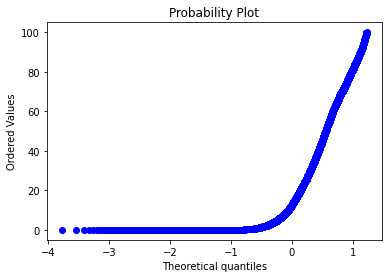

In [60]:
fig = plt.figure()
res = stats.probplot(wwint['Internet_user%'], dist="norm", plot=plt)
plt.show()

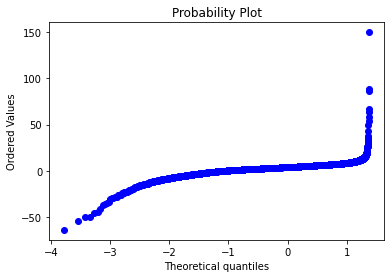

In [61]:
fig = plt.figure()
res = stats.probplot(wwint['GDP'], dist="norm", plot=plt)
plt.show()

In [62]:
#normalized_wwint=(wwint-wwint.mean())/wwint.std()